In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

### 1. Прочтём файл tab3-zpl_2023.xlsx с заработными платами работников  по отраслям в России

#### Первый лист в файле, данные за 2000-2016 года

In [22]:
df_2000_2016 = pd.read_excel('data/tab3-zpl_2023.xlsx', sheet_name='2000-2016 гг.', header=2)
df_2000_2016 = df_2000_2016.dropna()
df_2000_2016.rename(columns={'Unnamed: 0': 'Отрасль'}, inplace=True)

#### Второй лист в файле, данные за 2017-2023 года

In [23]:
df_2017_2023 = pd.read_excel('data/tab3-zpl_2023.xlsx', sheet_name='с 2017 г.', header=4)
df_2017_2023.columns = ['Отрасль', 2017, 2018, 2019, 2020, 2021, 2022, 2023]
df_2017_2023 = df_2017_2023.dropna()

#### Объединим данные, где названия отраслей совпадают и выведем на экран

In [24]:
def rename(str):
    str = str.strip().capitalize()
    return str

df_2000_2016['Отрасль'] = df_2000_2016['Отрасль'].apply(rename)
df_2017_2023['Отрасль'] = df_2017_2023['Отрасль'].apply(rename)
df = df_2000_2016.merge(df_2017_2023, on='Отрасль')
df.index = df['Отрасль'].values
df.drop('Отрасль', axis=1, inplace=True)
df = df.T
df.head()

,Добыча полезных ископаемых,Обрабатывающие производства,Производство кокса и нефтепродуктов,Строительство,Образование
2000,5940.2,2365.2,4916.3,2639.8,1240.2
2001,9099.2,3446.6,7012.4,3859.3,1833.0
2002,11080.9,4439.1,9625.3,4806.9,2927.3
2003,13912.4,5603.4,11879.0,6176.7,3386.6
2004,16841.7,6848.9,13729.3,7304.7,4203.4


In [31]:
df.to_csv('data/df.csv')

#### Распечатаем график по первым трем отраслям

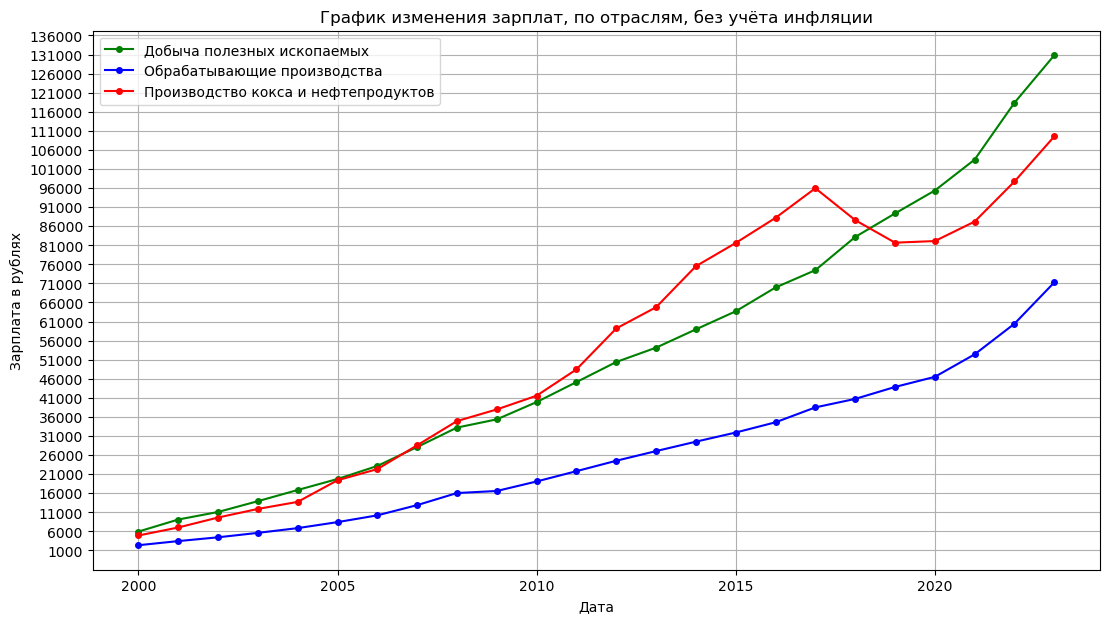

In [6]:
plt.figure(figsize=[13,7])
plt.yticks(np.arange(1000, 150000, step=5000))
plt.grid()
plt.plot(df['Добыча полезных ископаемых'], color='green', marker='.', markersize=8)
plt.plot(df['Обрабатывающие производства'], color='blue', marker='.', markersize=8)
plt.plot(df['Производство кокса и нефтепродуктов'], color='red', marker='.', markersize=8)
plt.title('График изменения зарплат, по отраслям, без учёта инфляции')
plt.xlabel('Дата')
plt.ylabel('Зарплата в рублях')
plt.legend(df.columns)
plt.show()

Вывод

#### Добавим в датафрейм годовую инфляцию заработной платы с учётом инфляции

In [26]:
df_inf = pd.read_csv('data/inflation.csv', sep='\t', header=None, index_col=0)
df_inf['Кумулятивная инфляция'] = 1 + df_inf[13]/100
df_inf['Кумулятивная инфляция'] = df_inf['Кумулятивная инфляция'].cumprod()
df_inf = df_inf.rename(columns={13: 'Годовая инфляция'})
df = pd.merge(df, df_inf[['Кумулятивная инфляция', 'Годовая инфляция']], left_index=True, right_index=True)
df['Добыча полезных ископаемых, с учётом инфляции'] = df['Добыча полезных ископаемых'] * df['Кумулятивная инфляция']
df['Обрабатывающие производства, с учётом инфляции'] = df['Обрабатывающие производства'] * df['Кумулятивная инфляция']
df['Производство кокса и нефтепродуктов, с учётом инфляции'] = df['Производство кокса и нефтепродуктов'] * df['Кумулятивная инфляция']
df.head()

,Добыча полезных ископаемых,Обрабатывающие производства,Производство кокса и нефтепродуктов,Строительство,Образование,Кумулятивная инфляция,Годовая инфляция,"Добыча полезных ископаемых, с учётом инфляции","Обрабатывающие производства, с учётом инфляции","Производство кокса и нефтепродуктов, с учётом инфляции"
2000,5940.2,2365.2,4916.3,2639.8,1240.2,8.938029,20.20,53093.677006,21140.225052,43942.029606
2001,9099.2,3446.6,7012.4,3859.3,1833.0,7.435964,18.58,67661.322044,25628.792922,52143.952732
2002,11080.9,4439.1,9625.3,4806.9,2927.3,6.270841,15.06,69486.567345,27836.892409,60358.730488
2003,13912.4,5603.4,11879.0,6176.7,3386.6,5.450062,11.99,75823.444283,30538.878101,64741.287962
2004,16841.7,6848.9,13729.3,7304.7,4203.4,4.866561,11.74,81961.167301,33330.592442,66814.481569


#### Распечатаем график зарплат с учётом инфляции

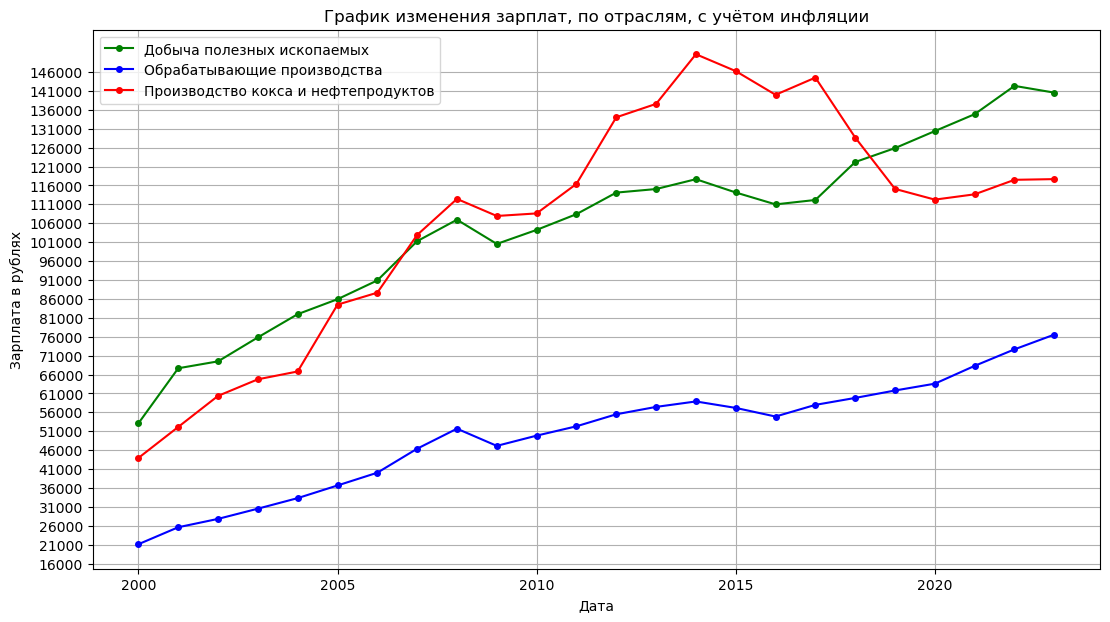

In [28]:
plt.figure(figsize=[13,7])
plt.yticks(np.arange(1000, 150000, step=5000))
plt.grid()
plt.plot(df['Добыча полезных ископаемых, с учётом инфляции'], color='green', marker='.', markersize=8)
plt.plot(df['Обрабатывающие производства, с учётом инфляции'], color='blue', marker='.', markersize=8)
plt.plot(df['Производство кокса и нефтепродуктов, с учётом инфляции'], color='red', marker='.', markersize=8)
plt.title('График изменения зарплат, по отраслям, с учётом инфляции')
plt.xlabel('Дата')
plt.ylabel('Зарплата в рублях')
plt.legend(df.columns)
plt.show()